<a href="https://colab.research.google.com/github/owenc8/IAT360_final_project/blob/main/final_proj_CV_IAT360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

Making directories

In [4]:
test_dir = '/content/drive/MyDrive/CV_final_project/validation_files'
train_dir = '/content/drive/MyDrive/CV_final_project/train_files'

In [34]:
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/images')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/labels')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/images/train')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/images/val')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/labels/train')
os.makedirs('/content/drive/MyDrive/CV_final_project/Final_data/labels/val')

In [5]:
label_dir= "/content/drive/MyDrive/CV_final_project/Final_data/labels"
image_dir="/content/drive/MyDrive/CV_final_project/Final_data/images"

Train

In [36]:
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


Validation

In [37]:
#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))

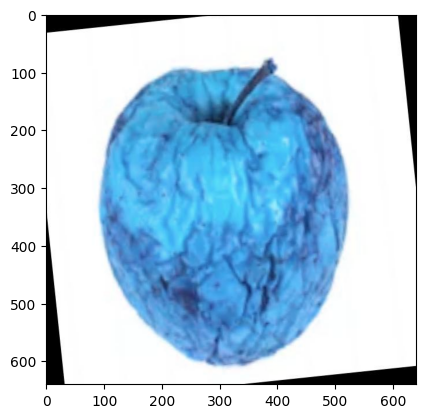

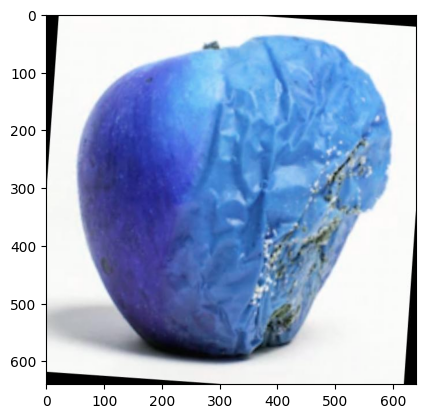

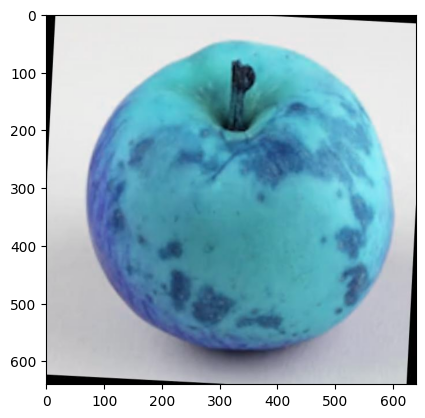

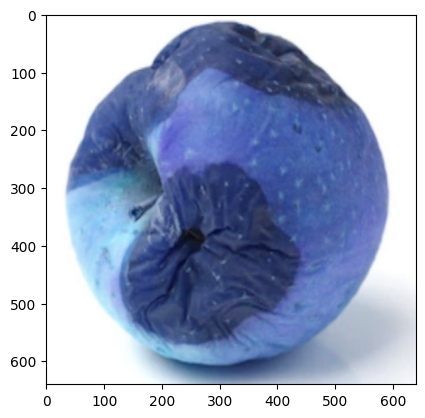

In [6]:
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

Train Dataframe

In [7]:
df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

Streaming output truncated to the last 5000 lines.
<Element 'filename' at 0x79f41ebe09f0>
<Element 'path' at 0x79f41ebe2480>
<Element 'source' at 0x79f41ebe3b50>
<Element 'database' at 0x79f41ebe2bb0>
<Element 'size' at 0x79f41ebe3a60>
<Element 'width' at 0x79f41ebe2250>
<Element 'height' at 0x79f41ebe05e0>
<Element 'depth' at 0x79f41ebe19e0>
<Element 'segmented' at 0x79f41ebe3ab0>
<Element 'object' at 0x79f41ebe18f0>
<Element 'name' at 0x79f41ebe2980>
<Element 'pose' at 0x79f41ebe3100>
<Element 'truncated' at 0x79f41ebe0e00>
<Element 'difficult' at 0x79f41ebe0ef0>
<Element 'occluded' at 0x79f41ebe2c50>
<Element 'bndbox' at 0x79f41ebe27f0>
<Element 'xmin' at 0x79f41ebe1030>
<Element 'xmax' at 0x79f41ebe2840>
<Element 'ymin' at 0x79f41ebe1f30>
<Element 'ymax' at 0x79f41ebe3010>
/content/drive/MyDrive/CV_final_project/Final_data/labels/train/banana_1_jpg.rf.672dc68e44c9a90ce5fdd3aac303bce7.xml
<Element 'annotation' at 0x79f41ebe0810>
<Element 'folder' at 0x79f41ebe1bc0>
<Element 'filenam

Val Dataframe

In [8]:
df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [9]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,Screen-Shot-2018-06-08-at-2-49-27-PM_png.rf.1b...,rotten_apple,640,640,27,82,565,612
1,Screen-Shot-2018-06-08-at-2-42-06-PM_png.rf.85...,rotten_apple,640,640,51,70,572,597
2,Screen-Shot-2018-06-08-at-2-50-38-PM_png.rf.ca...,rotten_apple,640,640,114,14,578,606
3,Screen-Shot-2018-06-08-at-2-38-33-PM_png.rf.29...,rotten_apple,640,640,29,67,577,562
4,Screen-Shot-2018-06-08-at-2-30-57-PM_png.rf.43...,rotten_apple,640,640,56,43,595,599


visualize

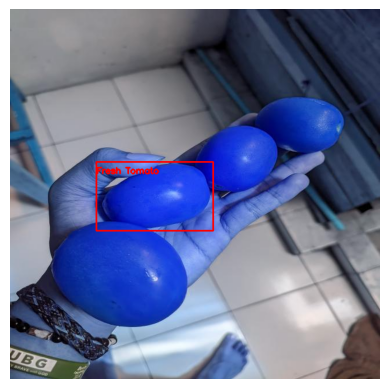

In [10]:
index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [11]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

                                                 name         label  width  \
8   PXL_20230804_104126966-PORTRAIT_jpg.rf.6b95db6...  Fresh Tomato    640   
9   PXL_20230804_104126966-PORTRAIT_jpg.rf.6b95db6...  Fresh Tomato    640   
10  PXL_20230804_104126966-PORTRAIT_jpg.rf.6b95db6...  Fresh Tomato    640   
11  PXL_20230804_104126966-PORTRAIT_jpg.rf.6b95db6...  Fresh Tomato    640   

    height  xmin  ymin  xmax  ymax  
8      640   424   147   578   257  
9      640   314   198   467   321  
10     640   149   264   351   383  
11     640    72   368   309   553  


In [12]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    648 non-null    object
 1   label   648 non-null    object
 2   width   648 non-null    int64 
 3   height  648 non-null    int64 
 4   xmin    648 non-null    int64 
 5   ymin    648 non-null    int64 
 6   xmax    648 non-null    int64 
 7   ymax    648 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 40.6+ KB


labels


In [13]:
print(train_df['label'].unique())
print(val_df['label'].unique())

['Rotten Tomato' 'Fresh Tomato' 'rotten-orange' 'rotten-banana'
 'rotten_apple' 'banana' 'orange' 'apple']
['rotten_apple' 'rotten-orange' 'rotten-banana' 'banana' 'apple' 'orange'
 'Rotten Tomato' 'Fresh Tomato']


In [14]:
label_map = { 'apple': 0,
            'rotten_apple': 1,
            'banana': 2,
              'rotten-banana':3,
              'orange': 4,
              'rotten-orange': 5,
              'Fresh Tomato': 6,
              'Rotten Tomato' : 7}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

In [15]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

In [16]:
train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,PXL_20230804_104704329_jpg.rf.30e43cbd912cea79...,Rotten Tomato,640,640,265,343,357,403,7,0.485938,0.582812,0.143750,0.093750
1,PXL_20230804_104636106_jpg.rf.2cd53fb0e1f88821...,Rotten Tomato,640,640,246,238,460,427,7,0.551562,0.519531,0.334375,0.295312
2,PXL_20230804_104600925_jpg.rf.e66fe1e5fc0c6369...,Rotten Tomato,640,640,286,309,364,374,7,0.507812,0.533594,0.121875,0.101562
3,PXL_20230804_104758935_jpg.rf.58d8b9e7d42461d3...,Rotten Tomato,640,640,263,234,447,391,7,0.554688,0.488281,0.287500,0.245312
4,PXL_20230804_103612291-PORTRAIT_jpg.rf.3b86ce6...,Fresh Tomato,640,640,260,171,456,290,6,0.559375,0.360156,0.306250,0.185938


In [17]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)

before deleting (train data):  (3936, 13)
after deleting(train_data):  (3936, 13)
before deleting (val data):  (648, 13)
after deleting(val data):  (648, 13)


In [18]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

In [19]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

YOLO

In [20]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [21]:
from ultralytics import YOLO

In [22]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 69.4MB/s]


In [23]:
%%writefile config.yaml
path: /content/drive/MyDrive/LabFruit/Final_data
train: /content/drive/MyDrive/LabFruit/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/LabFruit/Final_data/images/val

# Classes
nc: 8 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: apple
  1: rotten_apple
  2: banana
  3: rotten-banana
  4: orange
  5: rotten-orange
  6: Fresh Tomato
  7: Rotten Tomato

Writing config.yaml


In [24]:
#https://docs.ultralytics.com/modes/train/

#epochs: Total number of training epochs. Each epoch represents a full pass over the entire dataset. Adjusting this value can affect training duration and model performance
#patience:Number of epochs to wait without improvement in validation metrics before early stopping the training. Helps prevent overfitting by stopping training when performance plateaus.
#batch size: Batch size, with three modes: set as an integer (e.g., batch=16), auto mode for 60% GPU memory utilization (batch=-1), or auto mode with specified utilization fraction (batch=0.70).
#lr0: Initial learning rate (i.e. SGD=1E-2, Adam=1E-3) . Adjusting this value is crucial for the optimization process, influencing how rapidly model weights are updated.
#imgsz: Target image size for training. All images are resized to this dimension before being fed into the model. Affects model accuracy and computational complexity.

model.train(data="config.yaml",epochs=20,patience=5,batch=16, lr0=0.001,imgsz=640)


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 90.2MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 51.7MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/train... 2013 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2028/2028 [27:29<00:00,  1.23it/s]


train: New cache created: /content/drive/MyDrive/LabFruit/Final_data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/val... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [02:46<00:00,  1.22it/s]

val: New cache created: /content/drive/MyDrive/LabFruit/Final_data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.03G      1.197      2.374      1.626         52        640: 100%|██████████| 127/127 [00:59<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        202        290      0.753       0.46      0.542      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       3.9G      1.128       1.33      1.524         41        640: 100%|██████████| 127/127 [00:59<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        202        290      0.754      0.538      0.633      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.05G      1.108      1.214      1.506         41        640: 100%|██████████| 127/127 [00:55<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


                   all        202        290      0.573      0.553      0.573      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.09G      1.092      1.193      1.489         43        640: 100%|██████████| 127/127 [00:55<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        202        290      0.433      0.666      0.582      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.02G      1.047      1.097      1.457         33        640: 100%|██████████| 127/127 [00:59<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]


                   all        202        290      0.638      0.775      0.764      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.87G      1.017      1.035      1.436         39        640: 100%|██████████| 127/127 [00:56<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


                   all        202        290      0.696      0.663      0.701      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.05G     0.9901     0.9731      1.402         58        640: 100%|██████████| 127/127 [00:55<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]


                   all        202        290      0.814      0.703      0.799      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.88G     0.9656     0.9234      1.383         43        640: 100%|██████████| 127/127 [00:57<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        202        290      0.685      0.797      0.805      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.02G     0.9151     0.8646       1.36         41        640: 100%|██████████| 127/127 [00:53<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        202        290      0.764      0.812      0.877       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.92G     0.9165     0.8291      1.346         37        640: 100%|██████████| 127/127 [00:55<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        202        290      0.795      0.882      0.895       0.64


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.03G     0.8944     0.7026      1.454         18        640: 100%|██████████| 127/127 [00:57<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]


                   all        202        290      0.822      0.826      0.856      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.88G     0.8508     0.6398      1.402         16        640: 100%|██████████| 127/127 [00:54<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        202        290       0.76      0.905      0.872      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.01G     0.8144     0.5832      1.376         22        640: 100%|██████████| 127/127 [00:52<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        202        290      0.874      0.869      0.946      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       3.9G     0.7826     0.5372      1.345         26        640: 100%|██████████| 127/127 [00:55<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        202        290      0.862      0.909      0.926      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.88G     0.7551     0.4982       1.32         17        640: 100%|██████████| 127/127 [00:51<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        202        290      0.901      0.917      0.938      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.88G     0.7298     0.4807      1.301         17        640: 100%|██████████| 127/127 [00:51<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        202        290      0.912      0.895      0.943        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.01G     0.7095     0.4606       1.28         14        640: 100%|██████████| 127/127 [00:56<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


                   all        202        290      0.943      0.934      0.964      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.87G     0.6823       0.42      1.249         29        640: 100%|██████████| 127/127 [00:53<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        202        290      0.902      0.939      0.952      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.03G     0.6474     0.3905      1.223         20        640: 100%|██████████| 127/127 [00:52<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        202        290      0.908      0.936       0.95      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.88G     0.6229     0.3664      1.207         20        640: 100%|██████████| 127/127 [00:55<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        202        290      0.919      0.944       0.96      0.732



20 epochs completed in 0.336 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


                   all        202        290      0.919      0.944       0.96      0.732
                 apple         26         33      0.933      0.939      0.986      0.867
          rotten_apple         48         48       0.96      0.998      0.994      0.963
                banana         25         50      0.794      0.769      0.799      0.485
         rotten-banana         47         82      0.847      0.927      0.928      0.559
                orange         20         28      0.963      0.921      0.987      0.753
         rotten-orange         35         37      0.961          1      0.995      0.952
          Fresh Tomato          6          6      0.922          1      0.995      0.716
         Rotten Tomato          6          6      0.972          1      0.995      0.561
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79f30f53ec80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [25]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/val.cache... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.53it/s]


                   all        202        290      0.919      0.944       0.96      0.732
                 apple         26         33      0.933      0.939      0.986      0.864
          rotten_apple         48         48       0.96      0.998      0.994      0.963
                banana         25         50      0.793      0.767      0.799      0.484
         rotten-banana         47         82      0.848      0.927      0.928      0.557
                orange         20         28      0.963      0.921      0.987      0.753
         rotten-orange         35         37      0.961          1      0.995      0.954
          Fresh Tomato          6          6      0.922          1      0.995      0.716
         Rotten Tomato          6          6      0.972          1      0.995      0.561
Speed: 0.3ms preprocess, 10.0ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train2


0.9439780448607946